# Data Science & Business Analytics Intern @ TSF

## Name:Atipha Mohanty

## Task-1: Prediction using Supervised ML

#### Problem Statement: What be the predicted score if student studies for 9.25 hours/day

#### For this task we will be applying Linear Regression for predicting student's percentage based on the no. of study hours.

###### Data: http://bit.ly/w-data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
df.head(5)   # displays the top 5 data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

In [6]:
df.isnull().sum()  # to check missing values

Hours     0
Scores    0
dtype: int64

Text(0.5,1,'Hour Vs Percentage')

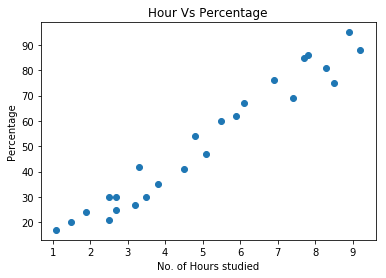

In [7]:
plt.scatter(x='Hours',y='Scores',data=df)
plt.xlabel("No. of Hours studied")
plt.ylabel("Percentage")
plt.title('Hour Vs Percentage')

A  linear relation between no. of hours studied and percentage secured is shown.

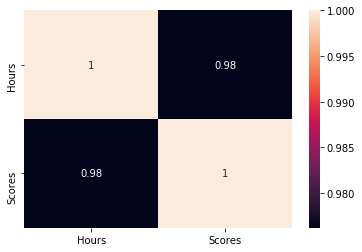

In [8]:
sns.heatmap(df.corr(),annot=True)

No. of Hours studied is highly correlated with the percentage score

## Preparing data into training and test set

In [9]:
X=df.drop('Scores',axis=1) #input
y=df['Scores']             #output

In [10]:
from sklearn.model_selection import train_test_split           
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Splitting 80% of the dataset into training data and 20% into test data

## Training the Model

In [11]:
from sklearn.linear_model import LinearRegression             #importing linear regression 
lr=LinearRegression()                                         #creating an object of the algorithm
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5,1,'Hour Vs Percentage')

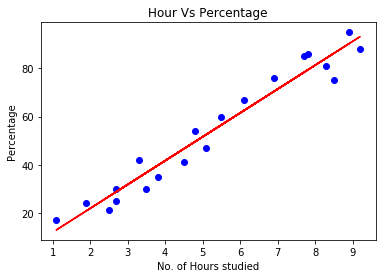

In [12]:
line=lr.coef_*X_train+lr.intercept_
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,line,color='red')
plt.xlabel("No. of Hours studied")
plt.ylabel("Percentage")
plt.title('Hour Vs Percentage')


Text(0.5,1,'Hour Vs Percentage')

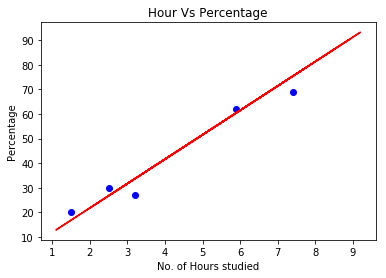

In [13]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_train,line,color='red')
plt.xlabel("No. of Hours studied")
plt.ylabel("Percentage")
plt.title('Hour Vs Percentage')


## making predictions

In [14]:
y_pred=lr.predict(X_test)  #Predicting the scores

In [15]:
#comparing actual Vs predicted scores
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1.head()

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [17]:
hours = [9.25]
own_pred = lr.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = [9.25]
Predicted Score = [93.69173249]


## Evaluating model

In [19]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('r2 Error:',r2_score(y_test,y_pred))          #higher value,better model
print('MSE:',mean_squared_error(y_test,y_pred))     #lower value,better model
print('MAE:',mean_absolute_error(y_test,y_pred))    #lower value,better model

r2 Error: 0.9454906892105356
MSE: 21.5987693072174
MAE: 4.183859899002975
